In [2]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
xgb_params1 ={
    'colsample_bytree': 0.9, 
    'eval_metric': 'rmse', 
    'learning_rate': 0.1, 
    'max_depth': 6, 
    'min_child_weight': 3, 
    'objective': 'reg:linear', 
    'seed': 1204, 
    'subsample': 0.9500000000000001
}

In [4]:
all_data = pd.read_pickle("new_sales_features.pickle")
all_data.tail(1)

,shop_id,item_id,date_block_num,target,item_category_id,shop_block_target_sum,shop_block_target_mean,item_block_target_mean,item_block_target_sum,item_cat_block_target_sum,...,target_lag_12,item_block_target_mean_lag_24,item_block_target_sum_lag_24,shop_block_target_mean_lag_24,shop_block_target_sum_lag_24,item_cat_block_target_mean_lag_24,item_cat_block_target_sum_lag_24,target_lag_24,Newyear,off_season
11128049,45,969,34,0.0,37,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.21997,1625.0,1.06548,7420.0,0.0,0,0


In [5]:
def get_X_y(df, end, clip_value = 20):
    df = df.loc[df.date_block_num <= end]
    X = df.drop(["target", "shop_block_target_mean", "shop_block_target_sum", 
                 "item_block_target_sum", "item_block_target_mean", "item_cat_block_target_mean", 
                "item_cat_block_target_sum"], axis = 1)
    
    y = np.clip(df.target, 0, clip_value)
    return X, y
X,y = get_X_y(all_data, 33)

In [7]:
X.head()

,shop_id,item_id,date_block_num,item_category_id,item_block_target_mean_lag_1,item_block_target_sum_lag_1,shop_block_target_mean_lag_1,shop_block_target_sum_lag_1,item_cat_block_target_mean_lag_1,item_cat_block_target_sum_lag_1,...,target_lag_12,item_block_target_mean_lag_24,item_block_target_sum_lag_24,shop_block_target_mean_lag_24,shop_block_target_sum_lag_24,item_cat_block_target_mean_lag_24,item_cat_block_target_sum_lag_24,target_lag_24,Newyear,off_season
8428273,27,20463,24,72,1.050000,63.0,1.429917,7896.0,1.089438,3971.0,...,0.0,0.000000,0.0,1.181431,5548.0,1.193452,802.0,0.0,1,0
8428274,27,20462,24,72,1.033333,62.0,1.429917,7896.0,1.089438,3971.0,...,0.0,0.000000,0.0,1.181431,5548.0,1.193452,802.0,0.0,1,0
8428275,27,20448,24,72,1.100000,44.0,1.429917,7896.0,1.089438,3971.0,...,2.0,0.000000,0.0,1.181431,5548.0,1.193452,802.0,0.0,1,0
8428276,27,20417,24,72,1.000000,9.0,1.429917,7896.0,1.089438,3971.0,...,0.0,1.076923,28.0,1.181431,5548.0,1.193452,802.0,0.0,1,0
8428277,27,20419,24,72,1.000000,5.0,1.429917,7896.0,1.089438,3971.0,...,0.0,0.000000,0.0,1.181431,5548.0,1.193452,802.0,0.0,1,0


In [8]:
dtrain = xgb.DMatrix(X,y)
xgb_model = xgb.train(xgb_params1, dtrain, 100, [(dtrain, "train"), (dtrain, "valid")], verbose_eval=10)

[0]	train-rmse:1.08316	valid-rmse:1.08316
[10]	train-rmse:0.880624	valid-rmse:0.880624
[20]	train-rmse:0.83385	valid-rmse:0.83385
[30]	train-rmse:0.816784	valid-rmse:0.816784
[40]	train-rmse:0.807304	valid-rmse:0.807304
[50]	train-rmse:0.797566	valid-rmse:0.797566
[60]	train-rmse:0.791923	valid-rmse:0.791923
[70]	train-rmse:0.785957	valid-rmse:0.785957
[80]	train-rmse:0.780225	valid-rmse:0.780225
[90]	train-rmse:0.772651	valid-rmse:0.772651
[99]	train-rmse:0.769494	valid-rmse:0.769494


In [17]:
test_lags = pd.read_pickle("test_with_lags.pickle")
test_lags = test_lags.drop(["date_block_num", "target", "shop_block_target_sum", 
                           "shop_block_target_mean", "item_block_target_mean",
                           "item_block_target_sum", "item_cat_block_target_sum",
                           "item_cat_block_target_mean"], axis = 1)
test_lags

,shop_id,item_id,item_category_id,item_block_target_mean_lag_1,item_block_target_sum_lag_1,shop_block_target_mean_lag_1,shop_block_target_sum_lag_1,item_cat_block_target_mean_lag_1,item_cat_block_target_sum_lag_1,target_lag_1,...,target_lag_12,item_block_target_mean_lag_24,item_block_target_sum_lag_24,shop_block_target_mean_lag_24,shop_block_target_sum_lag_24,item_cat_block_target_mean_lag_24,item_cat_block_target_sum_lag_24,target_lag_24,Newyear,off_season
10913850,5,5037,19,1.000000,25.0,1.090155,1052.0,1.041791,2443.0,0.0,...,1.0,0.000000,0.0,1.131922,1390.0,1.209159,9030.0,0.0,0,0
10913851,5,5320,55,0.000000,0.0,1.090155,1052.0,1.022715,5808.0,0.0,...,0.0,0.000000,0.0,1.131922,1390.0,1.027602,11541.0,0.0,0,0
10913852,5,5233,19,1.024390,42.0,1.090155,1052.0,1.041791,2443.0,1.0,...,0.0,0.000000,0.0,1.131922,1390.0,1.209159,9030.0,0.0,0,0
10913853,5,5232,23,0.933333,28.0,1.090155,1052.0,1.055582,2203.0,0.0,...,0.0,0.000000,0.0,1.131922,1390.0,1.169405,5978.0,0.0,0,0
10913854,5,5268,20,0.000000,0.0,1.090155,1052.0,1.625431,6596.0,0.0,...,0.0,0.000000,0.0,1.131922,1390.0,4.161148,1885.0,0.0,0,0
10913855,5,5039,23,1.035714,29.0,1.090155,1052.0,1.055582,2203.0,1.0,...,0.0,0.000000,0.0,1.131922,1390.0,1.169405,5978.0,0.0,0,0
10913856,5,5041,20,1.033333,62.0,1.090155,1052.0,1.625431,6596.0,2.0,...,0.0,0.000000,0.0,1.131922,1390.0,4.161148,1885.0,0.0,0,0
10913857,5,5046,55,1.000000,12.0,1.090155,1052.0,1.022715,5808.0,0.0,...,1.0,0.000000,0.0,1.131922,1390.0,1.027602,11541.0,0.0,0,0
10913858,5,5319,55,1.000000,26.0,1.090155,1052.0,1.022715,5808.0,0.0,...,5.0,0.000000,0.0,1.131922,1390.0,1.027602,11541.0,0.0,0,0
10913859,5,5003,20,1.187500,95.0,1.090155,1052.0,1.625431,6596.0,0.0,...,0.0,0.000000,0.0,1.131922,1390.0,4.161148,1885.0,0.0,0,0


In [20]:
dtest = xgb.DMatrix(test_lags)
test_pred = xgb_model.predict(dtest)
test_pred = np.clip(test_pred, 0, 20)


array([ 0.28105736,  0.16472381,  0.57906961, ...,  0.07177311,
        0.04524326,  0.02188426], dtype=float32)

In [22]:
test_pred[:5]

array([ 0.28105736,  0.16472381,  0.57906961,  0.37501347,  2.041888  ], dtype=float32)

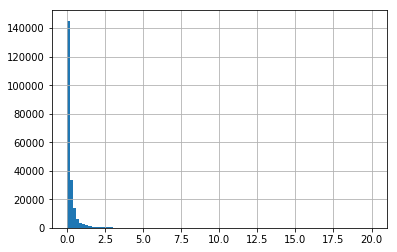

In [25]:
pd.Series(test_pred).hist(bins = 100)

In [26]:
sample = pd.read_csv("../sample_submission.csv")
sample["item_cnt_month"] = test_pred
sub = sample
sub.to_csv("submission/submission_xgboost.csv", index = False)

In [1]:
sub.head()

NameError: name 'sub' is not defined

In [9]:
dtrain = xgb.DMatrix(X)
xgb_train = xgb_model.predict(dtrain)
xgb_train = np.clip(xgb_train, 0, 20)
xgb_train

array([ 2.50225759,  0.98120594,  1.44784737, ...,  0.1105054 ,
        0.07139453,  0.06060559], dtype=float32)

In [10]:
y

8428273      2.0
8428274      1.0
8428275      3.0
8428276      1.0
8428277      1.0
8428278      2.0
8428279      1.0
8428280      4.0
8428281     17.0
8428282      2.0
8428283      1.0
8428284      1.0
8428285      1.0
8428286      1.0
8428287      1.0
8428288      1.0
8428289      2.0
8428290      2.0
8428291      1.0
8428292      3.0
8428293      1.0
8428294      2.0
8428295      1.0
8428296      1.0
8428297      1.0
8428298      2.0
8428299      7.0
8428300      2.0
8428301      8.0
8428302      4.0
            ... 
10913820     0.0
10913821     0.0
10913822     0.0
10913823     0.0
10913824     0.0
10913825     0.0
10913826     0.0
10913827     0.0
10913828     0.0
10913829     0.0
10913830     0.0
10913831     0.0
10913832     0.0
10913833     0.0
10913834     0.0
10913835     0.0
10913836     0.0
10913837     0.0
10913838     0.0
10913839     0.0
10913840     0.0
10913841     0.0
10913842     0.0
10913843     0.0
10913844     0.0
10913845     0.0
10913846     0.0
10913847     0

In [11]:
%store xgb_train

Stored 'xgb_train' (ndarray)
